# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
! pip install citipy

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#create empty list for retrieved data
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
#set record count to zero
record_counter = 0
set_counter= 1

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')



------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | tuktoyaktuk
Processing record 2 of set 1 | tasiilaq
Processing record 3 of set 1 | sao filipe
Processing record 4 of set 1 | busselton
Processing record 5 of set 1 | ushuaia
Processing record 6 of set 1 | georgetown
Processing record 7 of set 1 | faanui
Processing record 8 of set 1 | lorengau
Processing record 9 of set 1 | kapaa
Processing record 10 of set 1 | barrow
Processing record 11 of set 1 | severo-kurilsk
Processing record 12 of set 1 | codrington
Processing record 13 of set 1 | vestmannaeyjar
Processing record 14 of set 1 | cape town
Processing record 15 of set 1 | kalmunai
Processing record 16 of set 1 | mnogovershinnyy
Processing record 17 of set 1 | vila franca do campo
Processing record 18 of set 1 | marcona
City not found. Skipping...
Processing record 19 of set 1 | sambava
Processing record 20 of set 1 | albany
Processing record 21 of set 1 | sitka
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#create a dictionary & put into data frame
weather = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather)
weather_data.count()

City          597
Cloudiness    597
Country       597
Date          597
Humidity      597
Max Temp      597
Lat           597
Lng           597
Wind Speed    597
dtype: int64

In [98]:
#export to csv
weather_data.to_csv("cities.csv", encoding="utf-8", index=False)

#display dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,tuktoyaktuk,40,CA,1586540019,84,-0.40,69.45,-133.04,9.17
1,tasiilaq,20,GL,1586540104,68,26.60,65.61,-37.64,1.54
2,sao filipe,0,CV,1586540104,69,76.95,14.90,-24.50,12.86
3,busselton,75,AU,1586540105,48,70.00,-33.65,115.33,14.16
4,ushuaia,75,AR,1586540105,70,46.40,-54.80,-68.30,23.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

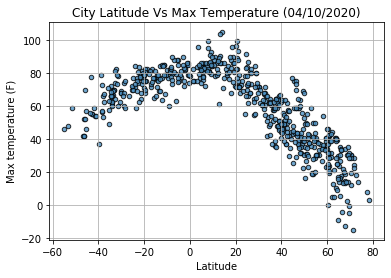

In [43]:
#plot data
weather_data.plot(kind='scatter', x='Lat', y='Max Temp', c='#4c91c3', alpha='0.8', edgecolors='#000000')

#add lavels
plt.title('City Latitude Vs Max Temperature (04/10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')

#add grid
plt.grid()

#save file
plt.savefig("Images/Fig1.png")

#display plot
plt.show()

#### Latitude vs. Humidity Plot

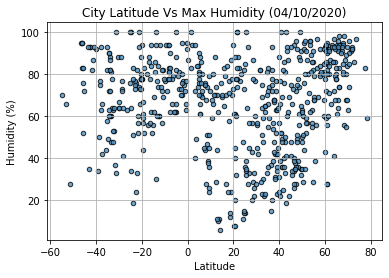

In [51]:
#plot data
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='#4c91c3', alpha='0.8', edgecolors='#000000')

#add labels
plt.title('City Latitude Vs Max Humidity (04/10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#add grid lines
plt.grid()

#save file
plt.savefig("Images/Fig2.png")

#display plot
plt.show()

#### Latitude vs. Cloudiness Plot

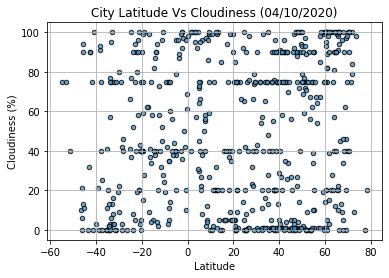

In [54]:
#plot data
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='#4c91c3', alpha='0.8', edgecolors='#000000')

#add labels
plt.title('City Latitude Vs Cloudiness (04/10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#add grid
plt.grid()

#save file
plt.savefig("Images/Fig3.png")

#display plot
plt.show()

#### Latitude vs. Wind Speed Plot

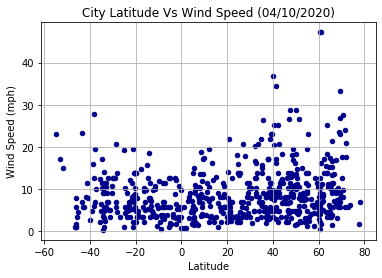

In [53]:
#plot data
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')

#add labels
plt.title('City Latitude Vs Wind Speed (04/10/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#add grid
plt.grid()

#save file
plt.savefig("Images/Fig4.png")

#display plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [59]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[weather_data["Lat"]>0.01]
southern_hemi_df = weather_data.loc[weather_data["Lat"]<-0.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7973301619821291


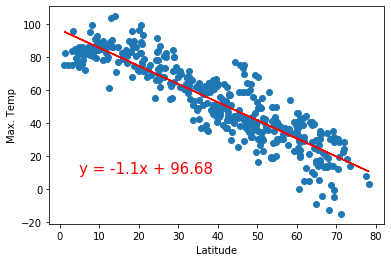

<Figure size 432x288 with 0 Axes>

In [73]:
#define x & y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

#add labels
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5490231964762357


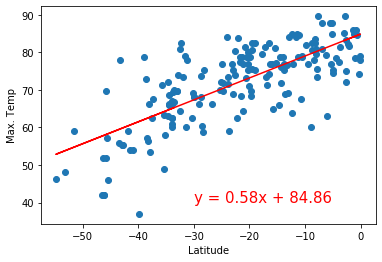

<Figure size 432x288 with 0 Axes>

In [78]:
#define x & y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

#add labels
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")


#show plot
plt.show()

#save file
plt.savefig("Images/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.08175222517290612


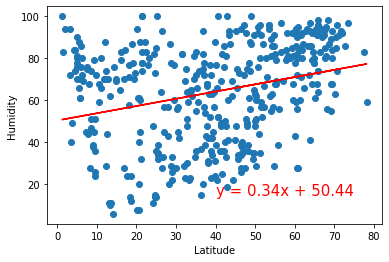

<Figure size 432x288 with 0 Axes>

In [85]:
#define x & y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

#add labels
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.017658329511549376


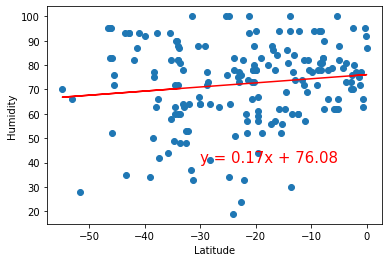

<Figure size 432x288 with 0 Axes>

In [86]:
#define x & y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

#add labels
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.012269064853095391


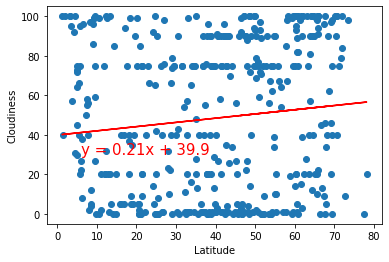

<Figure size 432x288 with 0 Axes>

In [92]:
#define x & y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")

#add labels
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.05155987635472485


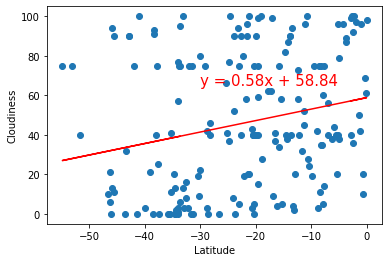

<Figure size 432x288 with 0 Axes>

In [90]:
#define x & y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red")

#add labels
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03805433303093304


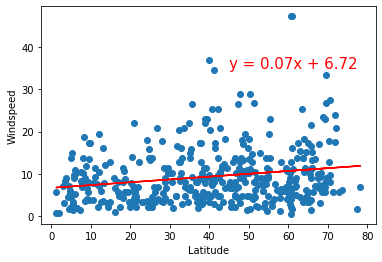

<Figure size 432x288 with 0 Axes>

In [99]:
#define x & y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,35),fontsize=15,color="red")

#add labels
plt.ylabel("Windspeed")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.05249080268189487


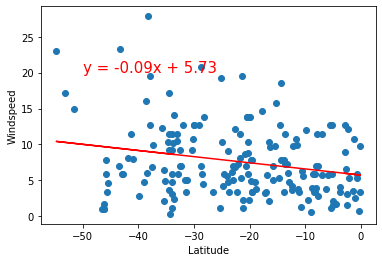

<Figure size 432x288 with 0 Axes>

In [100]:
#define x & y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#add labels
plt.ylabel("Windspeed")
plt.xlabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

#show plot
plt.show()

#save file
plt.savefig("Images/Fig12.png")